**PART-2**

In [ ]:
import numpy as np
import pandas as pd
import time

def f(x):
    return sum(4 * (x[:-1]**2 - x[1:])**2 + (x[:-1] - 1)**2) #objective function

def grad_f(x):
    n = len(x)
    grad = np.zeros_like(x)
    grad[:-1] += 8 * (x[:-1]**2 - x[1:]) * x[:-1] + 2 * (x[:-1] - 1)
    grad[1:] += -4 * (x[:-1]**2 - x[1:])
    return grad

def backtracking_line_search(x, p, grad, alpha0=0.9, rho=0.5, gamma=0.5): #to find step size
    alpha = alpha0
    while f(x + alpha * p) > f(x) + gamma * alpha * np.dot(grad, p):
        alpha *= rho
    return alpha

def bfgs(n, tol=1e-6, max_iter=1000):
    x = np.zeros(n)  # Starting point
    B = np.eye(n)   #b0=I
    grad = grad_f(x)
    k = 0

    while np.linalg.norm(grad) > tol and k < max_iter:
        p = -np.linalg.solve(B, grad)


        alpha = backtracking_line_search(x, p, grad) #LINE SEARCH

        x_new = x + alpha * p

        s = x_new - x #Sk
        y = grad_f(x_new) - grad #Yk

        Bs = B @ s #updating b using bfgs
        B += np.outer(y, y) / (y @ s) - np.outer(Bs, Bs) / (s @ Bs)


        x = x_new
        grad = grad_f(x)
        k += 1

    return x, k

n_values = [1000, 2500, 5000, 7500, 10000]
times = []
minimizers = []

for n in n_values:
    start_time = time.time()
    minimizer, iterations = bfgs(n)
    elapsed_time = time.time() - start_time
    times.append(elapsed_time)
    minimizers.append(minimizer)
    print(f"n={n}, Time Taken: {elapsed_time:.2f}s, Iterations: {iterations}, Minimizer: {minimizer[:5]}...")

results = pd.DataFrame({"n": n_values, "Time (s)": times, "Minimizer (First 5 values)": [minimizer[:5] for minimizer in minimizers]})
print(results)


n=1000, Time Taken: 15.12s, Iterations: 66, Minimizer: [1. 1. 1. 1. 1.]...
n=2500, Time Taken: 60.28s, Iterations: 73, Minimizer: [1. 1. 1. 1. 1.]...
n=5000, Time Taken: 263.66s, Iterations: 69, Minimizer: [1. 1. 1. 1. 1.]...
n=7500, Time Taken: 851.70s, Iterations: 73, Minimizer: [1. 1. 1. 1. 1.]...
n=10000, Time Taken: 1870.70s, Iterations: 73, Minimizer: [1. 1. 1. 1. 1.]...
       n     Time (s)                         Minimizer (First 5 values)
0   1000    15.117151  [0.9999999999953508, 1.0000000000222493, 0.999...
1   2500    60.278863  [0.9999999999181197, 1.0000000006820577, 1.000...
2   5000   263.656761  [1.0000000001558396, 1.0000000004280258, 1.000...
3   7500   851.704276  [0.9999999986079097, 0.9999999998308186, 1.000...
4  10000  1870.700079  [1.0000000007650052, 1.00000000106054, 1.00000...


**Observations:**

The BFGS method's runtime increases significantly as the size of n increases.
The algorithm consistently converges to a minimizer close to [1, 1, 1, 1, 1,...] regardless of the size of n, which indiactes that solution is stable for the objective function which is same as theoritical derived minimizer.


**PART-3**

In [23]:
def f(x):
    return sum(4 * (x[:-1]**2 - x[1:])**2 + (x[:-1] - 1)**2)

def grad_f(x):
    n = len(x)
    grad = np.zeros_like(x)
    grad[:-1] += 8 * (x[:-1]**2 - x[1:]) * x[:-1] + 2 * (x[:-1] - 1)
    grad[1:] += -4 * (x[:-1]**2 - x[1:])
    return grad

def hess_f(x):
    n = len(x)
    H = np.zeros((n, n))
    for i in range(n - 1):
        H[i, i] += 8 * (3 * x[i]**2 - x[i + 1]) + 2
        H[i, i + 1] += -4 * x[i]
        H[i + 1, i] += -4 * x[i]
    H[n - 1, n - 1] += 4
    return H

def backtracking_line_search(x, pk, grad, alpha0=0.9, rho=0.5, gamma=0.5):
    alpha = alpha0
    while f(x + alpha * pk) > f(x) + gamma * alpha * np.dot(grad, pk):
        alpha *= rho
    return alpha


def steepest_descent(n, tol=1, max_iter=1000):
    x = np.zeros(n)
    grad = grad_f(x)
    pk = -grad
    k = 0

    while np.linalg.norm(pk) > tol and k < max_iter:
        alpha = backtracking_line_search(x, pk, grad)
        x = x + alpha * pk
        grad = grad_f(x)
        pk = -grad
        k += 1

    return x, k

def newton_method(n, tol=1, max_iter=1000):
    x = np.zeros(n)
    grad = grad_f(x)
    k = 0

    while np.linalg.norm(grad) > tol and k < max_iter:
        H = hess_f(x)
        pk = -np.linalg.solve(H, grad)
        alpha = backtracking_line_search(x, pk, grad)
        x = x + alpha * pk
        grad = grad_f(x)
        k += 1

    return x, k

n_values = [1000, 2500, 5000,7500,10000]
results = []

for n in n_values:
    # Steepest Descent
    start_time = time.time()
    _, steepest_iterations = steepest_descent(n)
    steepest_time = time.time() - start_time

    # Newton's Method
    start_time = time.time()
    _, newton_iterations = newton_method(n)
    newton_time = time.time() - start_time

    results.append({
        "n": n,
        "Steepest Descent Time (s)": steepest_time,
        "Newton's Method Time (s)": newton_time,
    })

results_df = pd.DataFrame(results)
print(results_df)


       n  Steepest Descent Time (s)  Newton's Method Time (s)
0   1000                   0.063897                  0.298981
1   2500                   0.054156                  3.280833
2   5000                   0.104364                 20.744656
3   7500                   0.165937                 62.933990
4  10000                   0.098219                156.731197


**PART-4**

       n  Steepest Descent Time (s)  BFGS Time (s)
0   1000                   0.551440       6.918212
1   2500                   0.495077      46.178408
2   5000                   0.845828     268.275357
3   7500                   1.259106     873.343848
4  10000                   1.722904    1905.602981


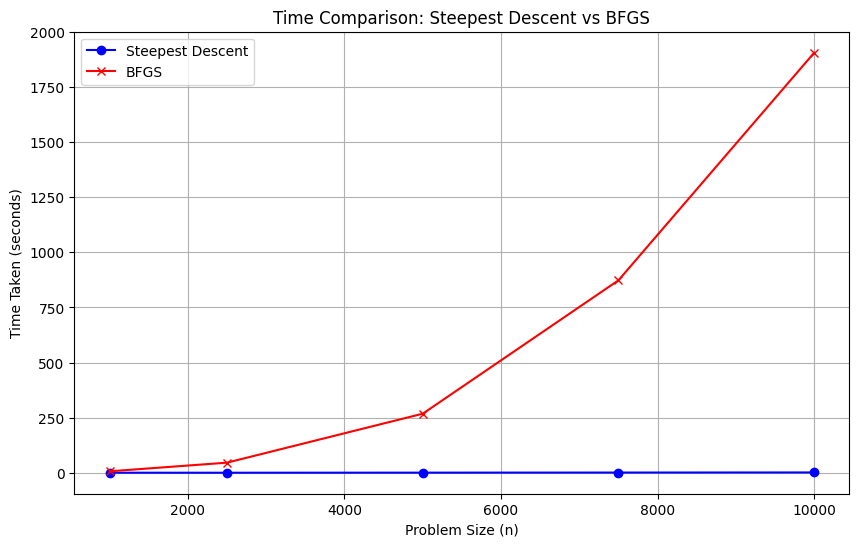

In [ ]:
import matplotlib.pyplot as plt

def f(x):
    return sum(4 * (x[:-1]**2 - x[1:])**2 + (x[:-1] - 1)**2)

def grad_f(x):
    n = len(x)
    grad = np.zeros_like(x)
    grad[:-1] += 8 * (x[:-1]**2 - x[1:]) * x[:-1] + 2 * (x[:-1] - 1)
    grad[1:] += -4 * (x[:-1]**2 - x[1:])
    return grad

def backtracking_line_search(x, p, grad, alpha0=0.9, rho=0.5, gamma=0.5):
    alpha = alpha0
    while f(x + alpha * p) > f(x) + gamma * alpha * np.dot(grad, p):
        alpha *= rho
    return alpha

def steepest_descent(n, tol=1e-6, max_iter=1000):
    x = np.zeros(n)  # Starting point
    grad = grad_f(x)
    k = 0

    while np.linalg.norm(grad) > tol and k < max_iter:
        p = -grad  # Steepest descent direction

        alpha = backtracking_line_search(x, p, grad)

        x_new = x + alpha * p

        grad = grad_f(x_new)
        x = x_new
        k += 1

    return x, k

def bfgs(n, tol=1e-6, max_iter=1000):
    x = np.zeros(n)  # Starting point
    B = np.eye(n)    # B0=I
    grad = grad_f(x)
    k = 0

    while np.linalg.norm(grad) > tol and k < max_iter:
        p = -np.linalg.solve(B, grad)  # Descent direction

        alpha = backtracking_line_search(x, p, grad)

        x_new = x + alpha * p

        s = x_new - x
        y = grad_f(x_new) - grad

        Bs = B @ s
        B += np.outer(y, y) / (y @ s) - np.outer(Bs, Bs) / (s @ Bs)

        x = x_new
        grad = grad_f(x)
        k += 1

    return x, k

n_values = [1000, 2500, 5000, 7500, 10000]
times_steepest = []
times_bfgs = []

for n in n_values:
    # Time Steepest Descent
    start_time = time.time()
    minimizer, iterations = steepest_descent(n)
    elapsed_time = time.time() - start_time
    times_steepest.append(elapsed_time)

    # Time BFGS
    start_time = time.time()
    minimizer, iterations = bfgs(n)
    elapsed_time = time.time() - start_time
    times_bfgs.append(elapsed_time)

results = pd.DataFrame({
    "n": n_values,
    "Steepest Descent Time (s)": times_steepest,
    "BFGS Time (s)": times_bfgs
})

print(results)

plt.figure(figsize=(10, 6))
plt.plot(n_values, times_steepest, label='Steepest Descent', color='blue', marker='o')
plt.plot(n_values, times_bfgs, label='BFGS', color='red', marker='x')
plt.xlabel('Problem Size (n)')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Comparison: Steepest Descent vs BFGS')
plt.legend()
plt.grid(True)
plt.show()


**Observations:**

Steepest Descent appears to be much faster for smaller n values than BFGS, because Steepest Descent uses only the gradient and a simple update rule.

The time taken by BFGS increases more significantly with larger n, showing an **exponential growth** in computation time. This is due to the algorithm's more complex update steps, which involve updating the Hessian matrix approximation.